<a href="https://colab.research.google.com/github/KZoc/Formacao_1_Data_Science/blob/main/Visualiza%C3%A7%C3%A3o_de_Dados/Visualiza%C3%A7%C3%A3o_com_Matplotlib/Notebook/An%C3%A1lise_de_S%C3%A9palas%20e%20P%C3%A9talas%20com%20Gr%C3%A1ficos%20de%20Dispers%C3%A3o%20e%20Distribui%C3%A7%C3%A3o%20-%20Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# - Importando Bibliotecas e Dados

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
URL = 'https://raw.githubusercontent.com/KZoc/Formacao_1_Data_Science/main/Visualiza%C3%A7%C3%A3o_de_Dados/Visualiza%C3%A7%C3%A3o_com_Matplotlib/Dados/iris.csv'
df =pd.read_csv(URL)

In [16]:
df.head()

,comprimento_sépala,largura_sépala,comprimento_pétala,largura_pétala,espécie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


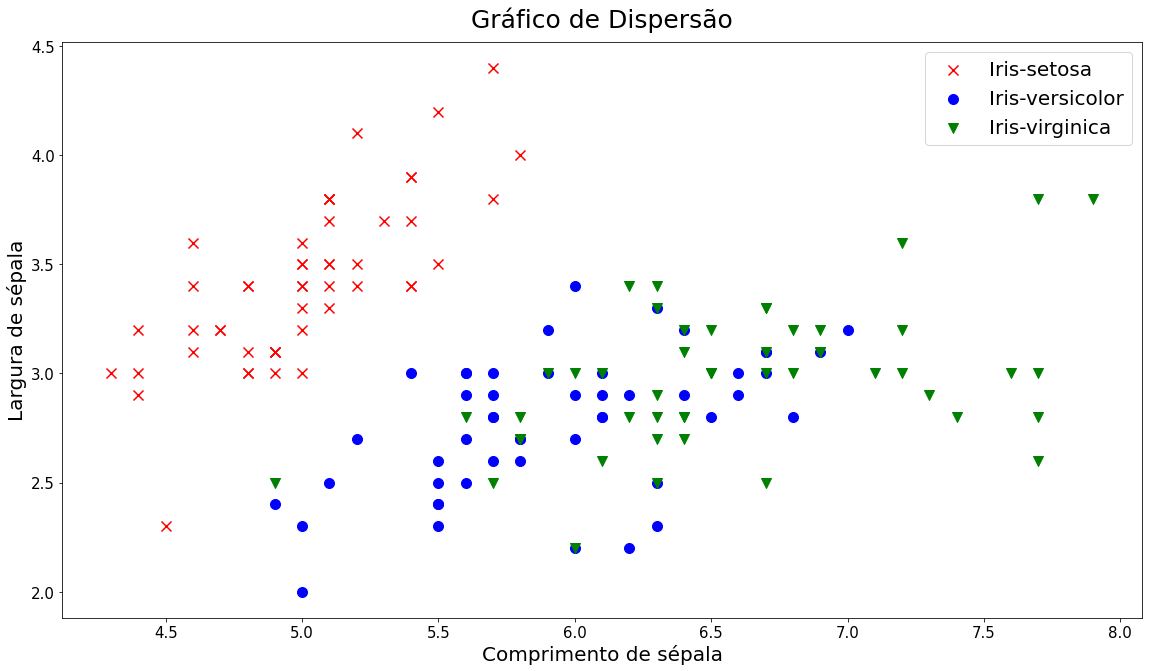

In [17]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])

cores = {'Iris-setosa': 'r', 'Iris-versicolor': 'b', 'Iris-virginica': 'g'}
marcadores = {'Iris-setosa': 'x', 'Iris-versicolor': 'o', 'Iris-virginica': 'v'}

for especie in df['espécie'].unique():
    tmp = df[df['espécie'] == especie]
    eixo.scatter(tmp['comprimento_sépala'], tmp['largura_sépala'],
                color=cores[especie], marker=marcadores[especie], s=100)

eixo.set_title('Gráfico de Dispersão', fontsize=25, pad=15)
eixo.set_xlabel('Comprimento de sépala', fontsize=20)
eixo.set_ylabel('Largura de sépala', fontsize=20)
eixo.tick_params(labelsize=15)
eixo.legend(cores, fontsize=20)

# Configurando Boxplot

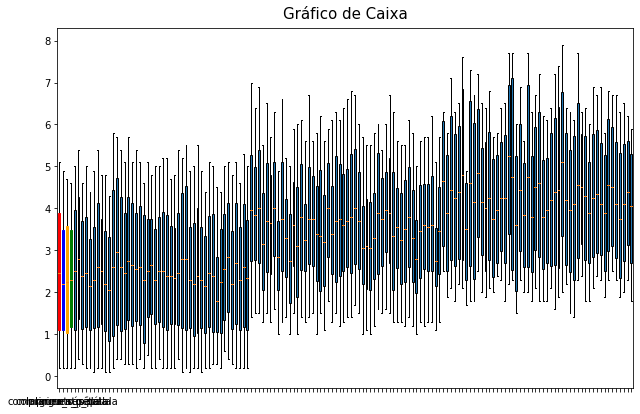

In [18]:
fig = plt.figure(figsize=(8,5))
eixo = fig.add_axes([0,0,1,1])

cores = ['red', 'blue', 'orange', 'green']

caixas = eixo.boxplot(df.drop('espécie', axis=1), patch_artist=True)
eixo.set_title('Gráfico de Caixa', fontsize=15, pad=10)
eixo.set_xticklabels(df.drop('espécie', axis=1).columns)

for caixa, cor in zip(caixas['boxes'], cores):
    caixa.set(color=cor)
    
for outlier in caixas['fliers']:
    outlier.set(marker='x', markersize=8)

# Outra forma de visualizar a distribuição de dados

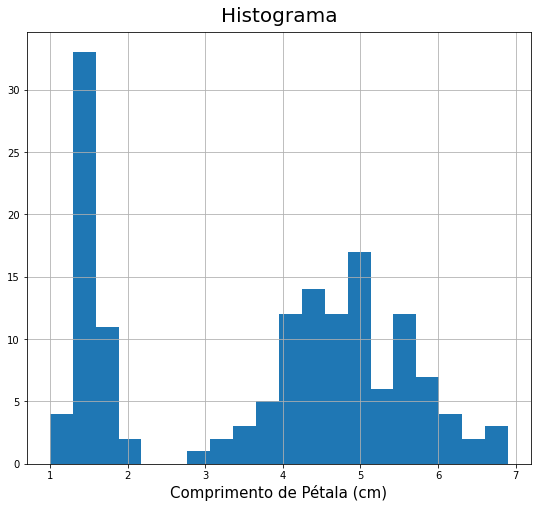

In [19]:
fig = plt.figure(figsize=(7,6))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(df['comprimento_pétala'], bins=20)
eixo.set_title('Histograma', fontsize=20, pad=10)
eixo.set_xlabel('Comprimento de Pétala (cm)', fontsize=15)
eixo.grid(True)

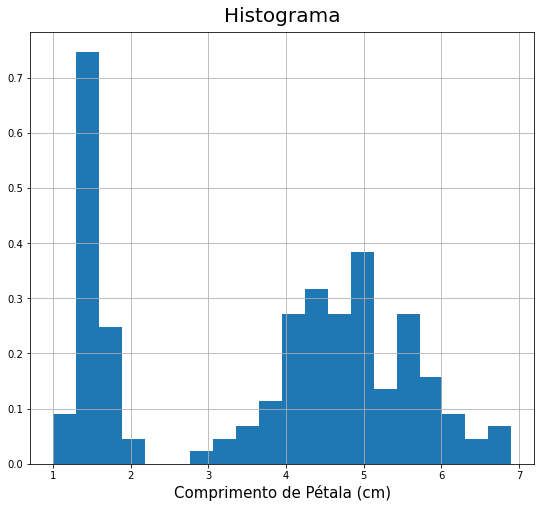

In [20]:
fig = plt.figure(figsize=(7,6))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(df['comprimento_pétala'], bins=20, density=True)
eixo.set_title('Histograma', fontsize=20, pad=10)
eixo.set_xlabel('Comprimento de Pétala (cm)', fontsize=15)
eixo.grid(True)

## Adicionando Anotações e Linhas Horizontais

Text(4.449999999999999, 31, '$Mediana (4.35)$')

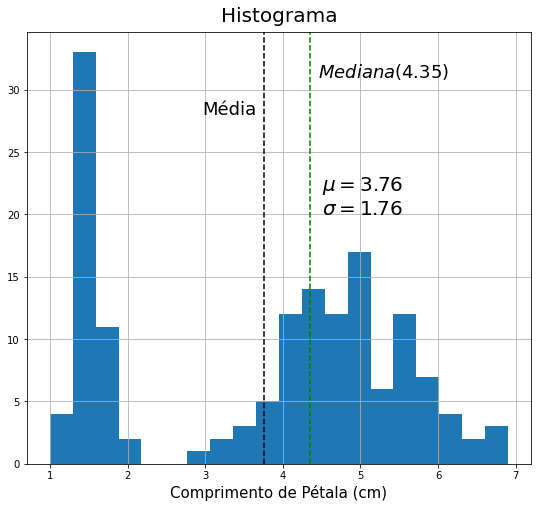

In [21]:
fig = plt.figure(figsize=(7,6))
eixo = fig.add_axes([0,0,1,1])

mu, sigma = df['comprimento_pétala'].mean(), df['comprimento_pétala'].std()

eixo.hist(df['comprimento_pétala'], bins=20)
eixo.set_title('Histograma', fontsize=20, pad=10)
eixo.set_xlabel('Comprimento de Pétala (cm)', fontsize=15)
eixo.grid(True)

eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma), xy=(4.5, 20), fontsize=20)

eixo.axvline(mu, color = 'k', linestyle = '--')
eixo.annotate('Média', xy = (mu-0.8, 28), fontsize=18)

eixo.axvline(df['comprimento_pétala'].median(), color = 'g', linestyle='--')
eixo.annotate('$Mediana ({0:.2f})$'.format(df['comprimento_pétala'].median()), xy=(df['comprimento_pétala'].median()+0.1, 31), fontsize=18)

# Combinando e Salvando Figuras

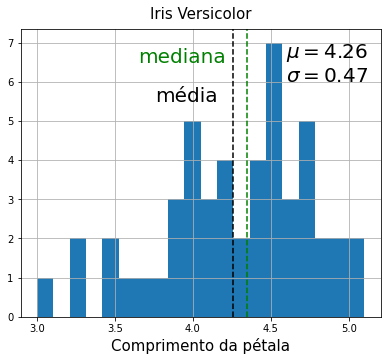

In [22]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

df_iv = df[df['espécie'] == 'Iris-versicolor']

mu, sigma = df_iv['comprimento_pétala'].mean(), df_iv['comprimento_pétala'].std()

eixo.hist(df_iv['comprimento_pétala'], bins=20)
eixo.set_title('Iris Versicolor', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da pétala', fontsize=15)
eixo.grid(True)

eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
               xy=(4.6, 6), fontsize=20)

eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('média', xy=(mu-0.5, 5.5), fontsize=20)

eixo.axvline(df_iv['comprimento_pétala'].median(), color='g', linestyle='--')
eixo.annotate('mediana', xy=(df_iv['comprimento_pétala'].median()-0.7, 6.5), fontsize=20,
               color='g')

fig.savefig('histograma_iv.png', bbox_inches='tight')

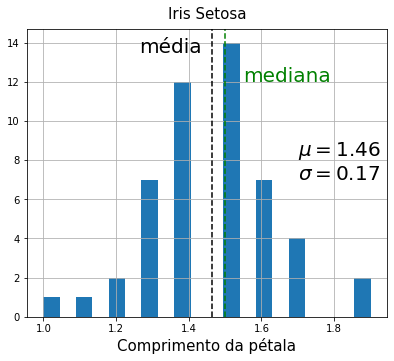

In [23]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

df_is = df[df['espécie'] == 'Iris-setosa']

mu, sigma = df_is['comprimento_pétala'].mean(), df_is['comprimento_pétala'].std()

eixo.hist(df_is['comprimento_pétala'], bins=20)
eixo.set_title('Iris Setosa', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da pétala', fontsize=15)
eixo.grid(True)

eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
               xy=(1.7, 7), fontsize=20)

eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('média', xy=(mu-0.2, 13.5), fontsize=20)

eixo.axvline(df_is['comprimento_pétala'].median(), color='g', linestyle='--')
eixo.annotate('mediana', xy=(df_is['comprimento_pétala'].median()+0.05, 12), fontsize=20,
               color='g')

fig.savefig('histograma_is.png', bbox_inches='tight')

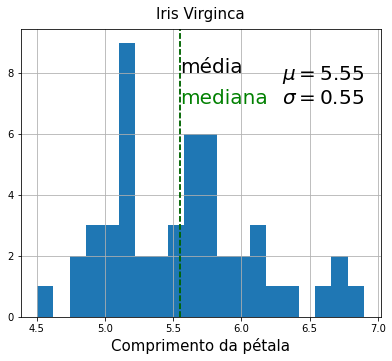

In [24]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

df_ivc = df[df['espécie'] == 'Iris-virginica']

mu, sigma = df_ivc['comprimento_pétala'].mean(), df_ivc['comprimento_pétala'].std()

eixo.hist(df_ivc['comprimento_pétala'], bins=20)
eixo.set_title('Iris Virginca', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da pétala', fontsize=15)
eixo.grid(True)

eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
               xy=(6.3, 7), fontsize=20)

eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('média', xy=(mu, 8), fontsize=20)

eixo.axvline(df_ivc['comprimento_pétala'].median(), color='g', linestyle='--')
eixo.annotate('mediana', xy=(df_ivc['comprimento_pétala'].median(), 7), fontsize=20,
               color='g')

fig.savefig('histograma_ivg.png', bbox_inches='tight')

In [25]:
from PIL import Image

largura, altura = Image.open('histograma_ivg.png').size
combinada = Image.new('RGB', (3*largura, altura))
intervalo = 0

for imagem in map(Image.open, ['histograma_iv.png', 'histograma_is.png',
                               'histograma_ivg.png']):
    combinada.paste(imagem, (intervalo,0))
    intervalo += largura
    
combinada.save('combinada.png')

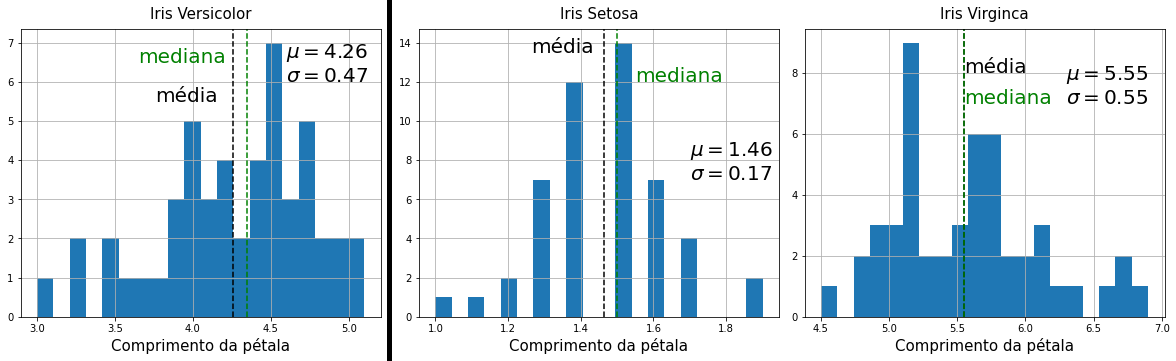

In [26]:
combinada